## Atmospheric Carbon Dioxide Dry Air Mole Fractions from quasi-continuous measurements at Mauna Loa, Hawaii.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
Path.cwd()
data_dir = (Path.cwd().parent / ".data").resolve()
assert data_dir.exists()

In [2]:
list(f"{pth.stem}{pth.suffix}" for pth in data_dir.glob("*"))

['sea_ice_n.csv',
 '.DS_Store',
 'co2_mlo_surface-insitu_1_ccgg_DailyData.csv',
 'rad_muc_hirsch.csv',
 'prison_population.csv',
 'rad_muc_margareten.csv',
 'extra-L02',
 'co2_spo.csv',
 'sea_ice_s.csv']

In [3]:

df = (
    pd.read_csv(
        data_dir / "co2_mlo_surface-insitu_1_ccgg_DailyData.csv",
        delim_whitespace=True,
        header=158,
    )
    .assign(date=lambda df: pd.to_datetime(df['datetime']))
    .drop(columns=["year", "month", "day", "hour", "minute", "second", "datetime", "time_decimal", "midpoint_time"]) # drop redundant cols
    # replace invalid values with NaN
    .assign(
        **{
            col: lambda df, col=col: df[col].where(df[col] >= 0) for col in ("value", "value_std_dev", "intake_height")
        }
    )
)

df

/var/folders/yl/_h6j91qd4d30w8vyy7hnlvjh0000gn/T/ipykernel_9994/1938936165.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pd.read_csv(


,site_code,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag,date
0,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-01 00:00:00+00:00
1,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-02 00:00:00+00:00
2,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-03 00:00:00+00:00
3,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-04 00:00:00+00:00
4,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-05 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
18392,MLO,428.19,0.11,4,19.536,-155.576,3437.0,3397.0,40.0,...,2024-04-27 00:00:00+00:00
18393,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,2024-04-27 00:00:00+00:00
18394,MLO,427.44,0.40,12,19.536,-155.576,3437.0,3397.0,40.0,...,2024-04-28 00:00:00+00:00
18395,MLO,425.85,0.17,15,19.536,-155.576,3437.0,3397.0,40.0,...,2024-04-29 00:00:00+00:00


Text(0.5, 0, 'Date')

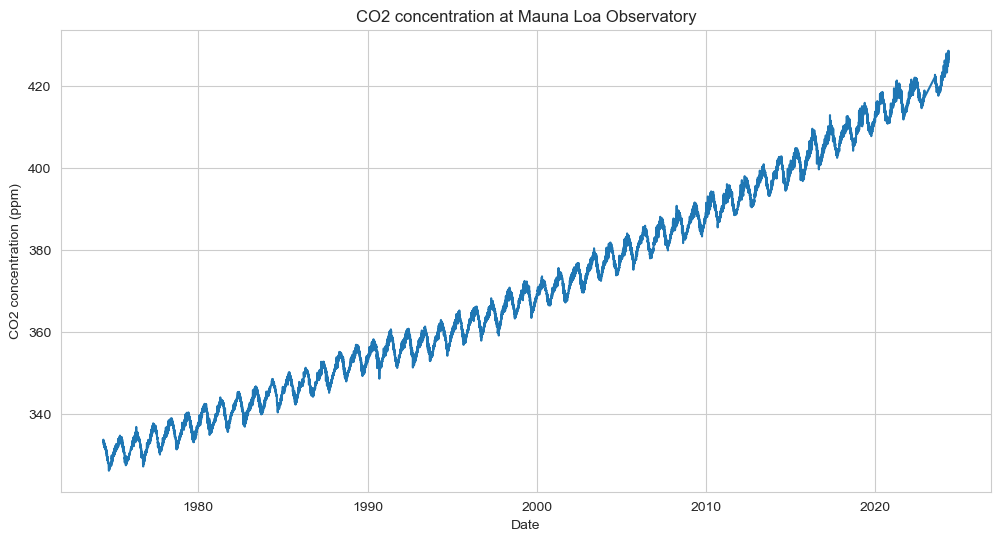

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="value")
plt.title("CO2 concentration at Mauna Loa Observatory")
plt.ylabel("CO2 concentration (ppm)")
plt.xlabel("Date")

The `dt.strftime` function in pandas is used to convert datetime values to strings based on a specified format. This function is particularly useful when you need to extract specific parts of a datetime object or format it in a particular way for visualization or further processing.

### Explanation
- `df["date"].dt.strftime("%B")`: This converts the `date` column in the DataFrame `df` to a string format representing the full month name (e.g., "January", "February").
- `"%B"`: This is the format code used in `strftime` to represent the full month name.

### Common Format Codes
- `%Y`: year with century (e.g., 2023)
- `%y`: year without century (e.g., 23)
- `%m`: month as a zero-padded decimal number (e.g., 01, 02)
- `%B`: Full month name (e.g., January, February)
- `%b`: Abbreviated month name (e.g., Jan, Feb)
- `%d`: Day of the month as a zero-padded decimal number (e.g., 01, 02)
- `%H`: Hour (24-hour clock) as a zero-padded decimal number (e.g., 00, 01)
- `%M`: Minute as a zero-padded decimal number (e.g., 00, 01)
- `%S`: Second as a zero-padded decimal number (e.g., 00, 01)

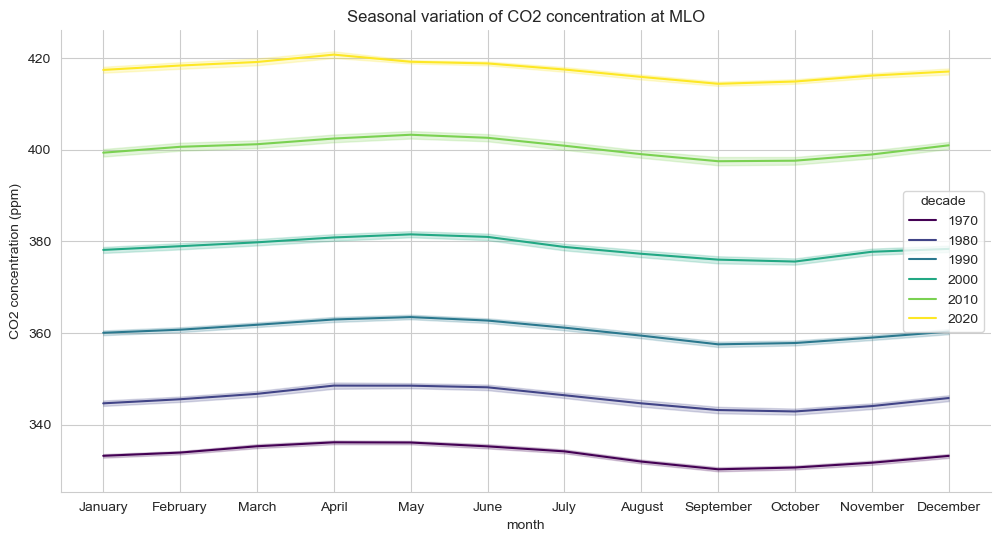

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    df.assign(
        decade=(df["date"].dt.year // 10) * 10,
        month=df["date"].dt.strftime("%B"),
    ),
    x="month",
    y="value",
    hue="decade",
    palette="viridis",
)
plt.title("Seasonal variation of CO2 concentration at MLO")
plt.xlabel("month")
plt.ylabel("CO2 concentration (ppm)")
sns.despine()
plt.show()

Text(3310.5515046296296, 0.5, 'CO2 concentration (ppm)')

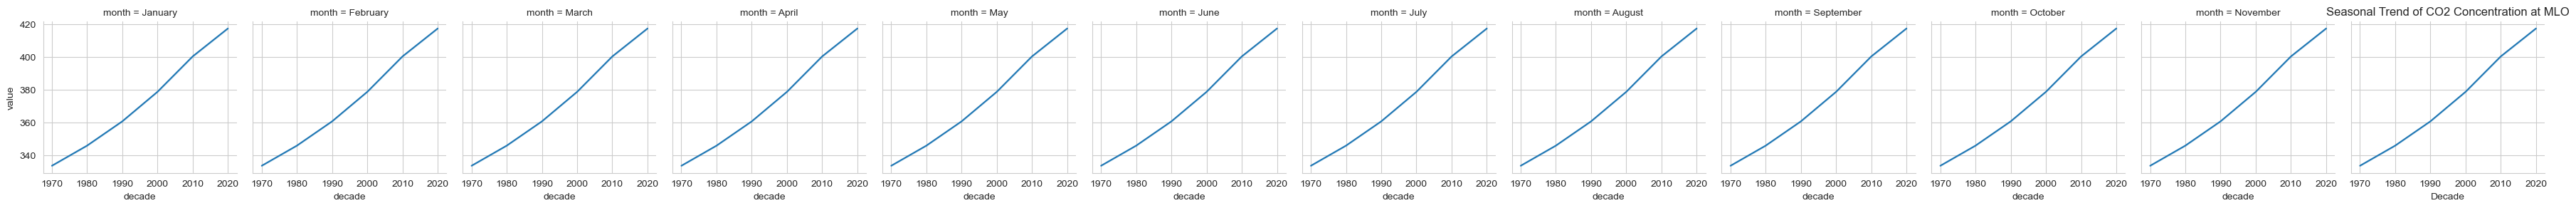

In [6]:
df_with_month = df.assign(
        decade=(df["date"].dt.year // 10) * 10,
        month=df["date"].dt.strftime("%B"),
)

g = sns.FacetGrid(data=df_with_month,
                  col="month")
g.map(sns.lineplot, data=df_with_month, x="decade", y="value")
plt.title("Seasonal Trend of CO2 Concentration at MLO")
plt.xlabel("Decade")
plt.ylabel("CO2 concentration (ppm)")

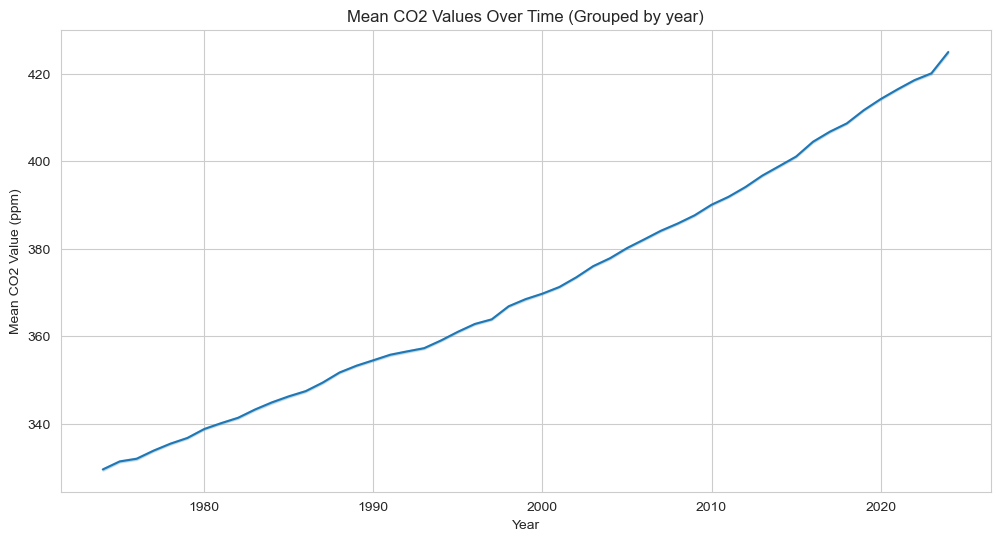

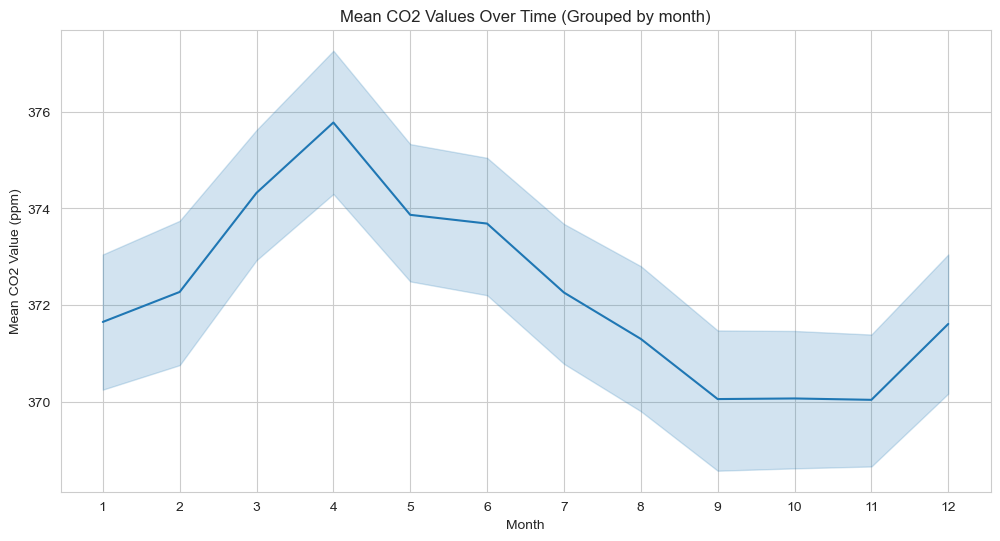

In [7]:
grouped_df = (
    df.groupby([df["date"].dt.year, df["date"].dt.month, df["date"].dt.day])
    .agg({"value": ["mean", "std"]})
    .rename_axis(["year", "month", "day"])
    .reset_index()
)

for time_col in ("year", "month"):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped_df, x=time_col, y=("value", "mean"))
    plt.title(f"Mean CO2 Values Over Time (Grouped by {time_col})")
    plt.xlabel(time_col.capitalize())
    plt.ylabel("Mean CO2 Value (ppm)")

    if time_col == "month":
        plt.xticks(ticks=range(1, 13), labels=range(1, 13))

In [8]:
df_r = df.set_index("date")

DatetimeIndex(['1974-01-01 00:00:00+00:00', '1974-01-02 00:00:00+00:00',
               '1974-01-03 00:00:00+00:00', '1974-01-04 00:00:00+00:00',
               '1974-01-05 00:00:00+00:00', '1974-01-06 00:00:00+00:00',
               '1974-01-07 00:00:00+00:00', '1974-01-08 00:00:00+00:00',
               '1974-01-09 00:00:00+00:00', '1974-01-10 00:00:00+00:00',
               ...
               '2024-04-23 00:00:00+00:00', '2024-04-23 00:00:00+00:00',
               '2024-04-24 00:00:00+00:00', '2024-04-25 00:00:00+00:00',
               '2024-04-26 00:00:00+00:00', '2024-04-27 00:00:00+00:00',
               '2024-04-27 00:00:00+00:00', '2024-04-28 00:00:00+00:00',
               '2024-04-29 00:00:00+00:00', '2024-04-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=18397, freq=None)

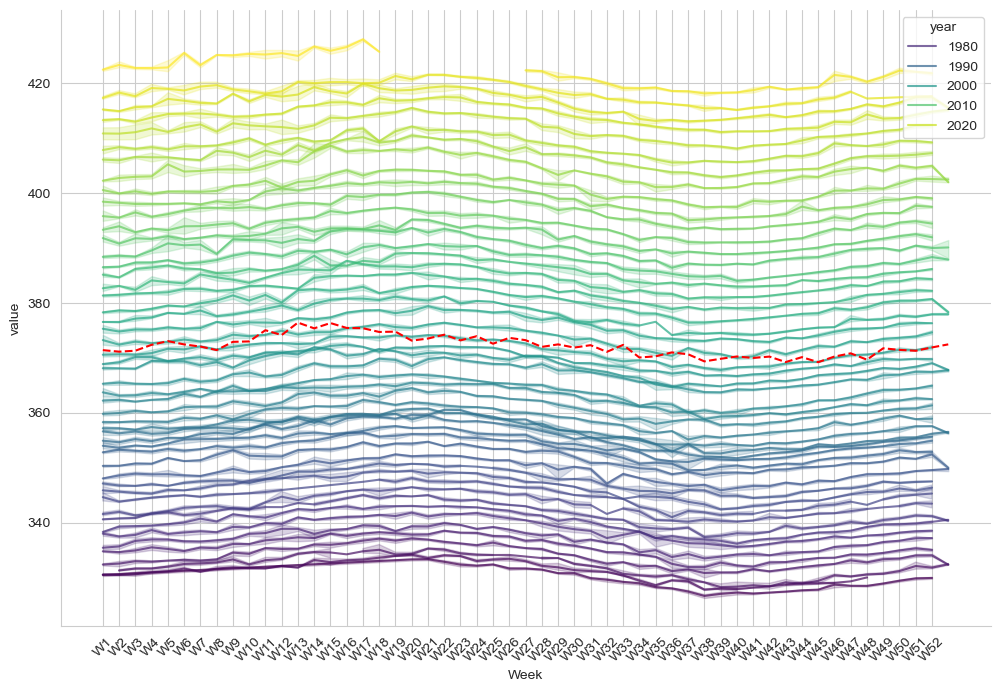

In [9]:
import tsa_helpers

# Usage example
tsa_helpers.season_plot(df_r.assign(year=df_r.index.year), 'week', 'value', hue="year", add_mean_line=True)
plt.show()

/Users/janduchscherer/Desktop/repos/time-series-analysis/time-series-analysis/tsa_helpers/tsa_helpers/vis.py:160: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["SubPeriod"] = df.index.to_period("Q").strftime(


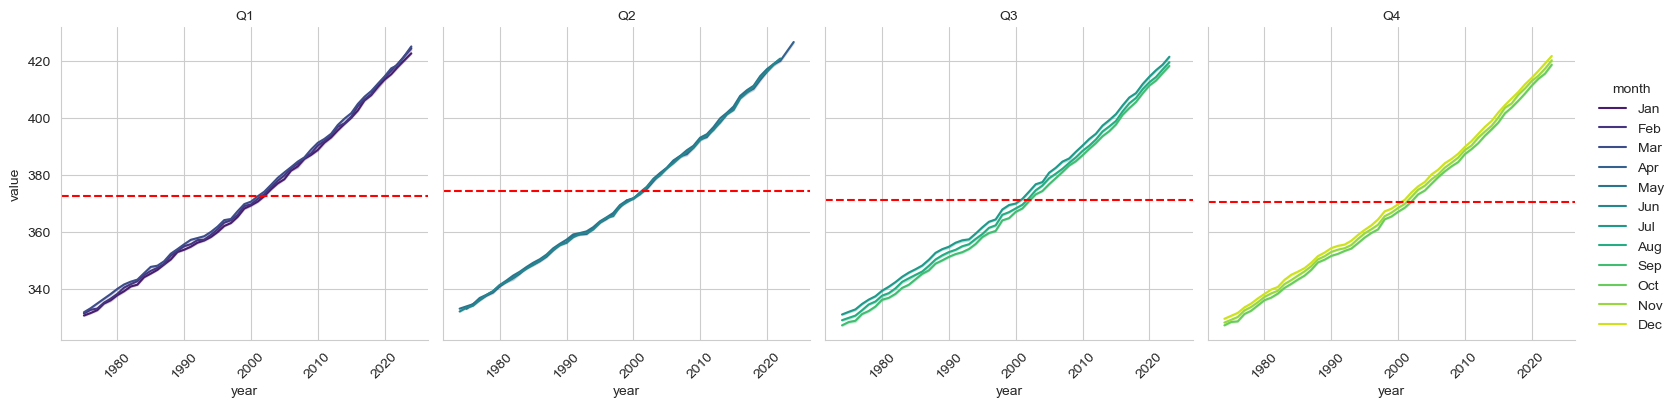

In [10]:
tsa_helpers.subseries_plot(df_r.assign(month=df_r.index.strftime('%b')), period="quarter", value_column="value", x_col="year", hue_col="month", col_wrap=4, add_mean_line=True)
plt.show()